In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

--2022-06-18 00:15:41--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.6’

spam.csv.6          100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2022-06-18 00:15:42 (12.6 MB/s) - ‘spam.csv.6’ saved [503663/503663]



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# rename columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [6]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [7]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test =tokenizer.texts_to_sequences(df_test)

In [8]:
# get word -> int mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 7189 unique tokens


In [9]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 121)


In [10]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 121)


In [11]:
# create the model

# embedding dimensionality
D = 20
# hidden state dimensionality
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D) (i)
x = LSTM(M, return_sequences=True) (x)
x = GlobalMaxPool1D() (x)
x = Dense(1, activation='sigmoid') (x)

model = Model(i, x)

In [12]:
# compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 18s 116ms/step - loss: 0.4730 - accuracy: 0.8642 - val_loss: 0.3817 - val_accuracy: 0.8695
Epoch 2/10
117/117 [==============================] - 7s 63ms/step - loss: 0.3634 - accuracy: 0.8642 - val_loss: 0.3117 - val_accuracy: 0.8695
Epoch 3/10
117/117 [==============================] - 6s 53ms/step - loss: 0.2242 - accuracy: 0.8813 - val_loss: 0.1789 - val_accuracy: 0.9429
Epoch 4/10
117/117 [==============================] - 6s 53ms/step - loss: 0.1413 - accuracy: 0.9821 - val_loss: 0.1286 - val_accuracy: 0.9777
Epoch 5/10
117/117 [==============================] - 6s 53ms/step - loss: 0.0959 - accuracy: 0.9906 - val_loss: 0.0996 - val_accuracy: 0.9821
Epoch 6/10
117/117 [==============================] - 6s 53ms/step - loss: 0.0662 - accuracy: 0.9930 - val_loss: 0.0838 - val_accuracy: 0.9831
Epoch 7/10
117/117 [==============================] - 6s 52ms/step - loss: 0.0474 - accuracy: 0.9946 - val_loss: 0.0729 - 

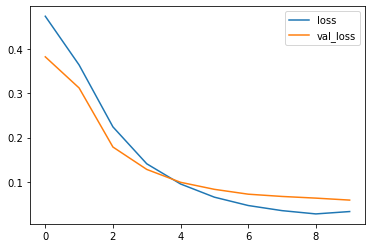

In [13]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

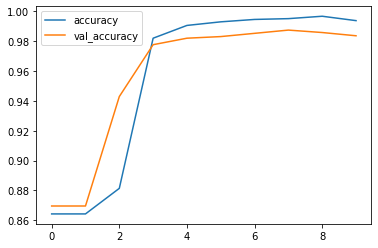

In [14]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()